In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Getting Old Faithful Dataset

The Old Faithful data set contains the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA (Fig. A.7). The two variables are:

The variable eruptions contains the eruption time (in minutes). Unusually, the histogram is bimodal.
The variable waiting is the waiting time (in minutes) until the next eruption. Unusually, the histogram is bimodal.

In [3]:
# the dataset is tab separated
df = pd.read_csv('https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv', sep='\t')
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Structure of Data

We can see that data contaions a total of 272 rows and two columns "eruptions" and "waiting" respectively.

In [4]:
#size of dataset df
df.shape

(272, 2)

## Standardization of Data

As mentioned in the book we will also make a linear re-scaling of the data, known as standardizing, such that each of the variables has zero mean and unit standard deviation.

In [5]:
(df.mean(),df.std())

(eruptions     3.487783
 waiting      70.897059
 dtype: float64,
 eruptions     1.141371
 waiting      13.594974
 dtype: float64)

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively. The equation is shown below:

$$  X_{stand} = (X - mean(X)) / SD(X)

In [6]:
#standaraize the data df
df_stand = (df - df.mean()) / df.std()
df_stand.head()

,eruptions,waiting
0,0.098318,0.596025
1,-1.478733,-1.242890
2,-0.135612,0.228242
3,-1.055558,-0.654437
4,0.915755,1.037364


As expected we have now mean = 1 and SD = 0

In [7]:
(df_stand.mean(),df_stand.std())


(eruptions    4.800082e-16
 waiting      4.261297e-16
 dtype: float64,
 eruptions    1.0
 waiting      1.0
 dtype: float64)

## Data Visualization

We can observe by seeing the data that it can be easily seperated into two clusters

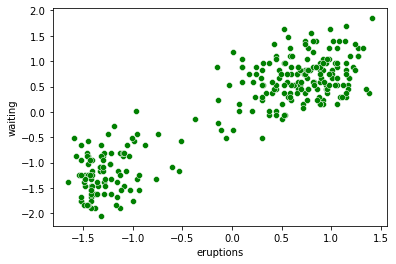

In [8]:
#scatter plot with green colour for df_stand where x is the first column and y is the second column
sns.scatterplot(x=df_stand.iloc[:,0], y=df_stand.iloc[:,1], color='green')
plt.grid(False)

## Cost Function

Below is the cost function we will be using which represents the sum of the squares of the distances of each data point to its
assigned vector µk. Our goal is to find values for the {rnk} and the {µk} so as to
minimize J. 

$$ J = \sum \limits_{n=1} ^{N} \sum \limits_{k=1} ^{K} r_{n,k} || X_{n} - \mu_{k}||^2




We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the rnk and the µk

In [9]:
costs =[]
iter=[]

#define  function to calculate the cost function
def cost_function(centroids, indicator, df_stand_array):
    #initialize the cost function
    cost = 0
    #for each point in the dataset
    for i in range(df_stand_array.shape[0]):
        for j in range(centroids.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            cost += indicator[i, j]*(np.linalg.norm(df_stand_array[i] - centroids[j]))**2
    return cost

    

## Code for plotting the scatter plot of both clusters

Note that this code is only for k=2

In [10]:
#scatter plot for distinguishing between different clusters

def cluster_plot(centroids,indicator,df):
    
    # seperate the df_stand_array into two clusters based on the indicator matrix
    df_cluster1 = df[np.where(indicator[:,0]== 1)]
    df_cluster2 = df[np.where(indicator[:,1]== 1)]
     #plot a line perpendicular to the line joining the centroids
    #find the middle point of centroids
    x_mid = (centroids[:,0].max() + centroids[:,0].min()) / 2
    y_mid = (centroids[:,1].max() + centroids[:,1].min()) / 2
    #find the slope of the line perpendicular to line joining the centroids
    slope = -(1/((centroids[1,1] - centroids[0,1]) / (centroids[1,0] - centroids[0,0])))
    plt.axline((x_mid, y_mid), slope=slope, linewidth=2, color='purple')
    plt.scatter(df_cluster1[:,0], df_cluster1[:,1], color='red')
    plt.scatter(df_cluster2[:,0], df_cluster2[:,1], color='blue')
    #plot the centroids with corresponding colour and of shape cross
    plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='x',s=100)
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(False)
    plt.show()

## Implementing K-Means 

Below is the code in which each iteration involves two successive steps corresponding to successive optimizations with respect
to the rnk and the µk. First we choose some initial values for the µk. Then in the first phase we minimize J with respect to the rnk, keeping the µk fixed. In the second phase we minimize J with respect to the µk, keeping rnk fixed. This two-stage optimization is then repeated until convergence.

This below function also plots the clusters at each iteration for each step.

In [11]:
# implement the k-means algorithm
def kmeans(k, df_stand_array, centroids):
    #initialize the indicator matrix
    indicator = np.zeros((df_stand_array.shape[0], k))
    cluster_plot(centroids, indicator, df_stand_array)
    #initialize the centroids
    #initialize the previous centroids
    prev_centroids = np.zeros((k, df_stand_array.shape[1]))
    #initialize the number of iterations
    iterations = 0
    
    # E step
    #initialize the distance between the previous and current centroids
    distance = np.linalg.norm(centroids - prev_centroids)
    #while the distance between the previous and current centroids is greater than 0.001
    while distance > 0.001:
        #for each point in the dataset
        for i in range(df_stand_array.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            j = np.argmin(np.linalg.norm(df_stand_array[i] - centroids, axis=1))
            indicator[i, j] = 1
            if j==1:
                indicator[i,0]=0
            else:
                indicator[i,1]=0
        #for each cluster
        cluster_plot(centroids, indicator, df_stand_array)
        costs.append(cost_function(centroids, indicator, df_stand_array))
        iter.append(iterations+0.5)
        # M step
        for i in range(k):
            #calculate the mean of each cluster
            centroids[i] = np.mean(df_stand_array[np.where(indicator[:, i] == 1)], axis=0)
        #print(centroids)
        #increment the number of iterations
        iterations += 1
        cluster_plot(centroids, indicator, df_stand_array)
        costs.append(cost_function(centroids, indicator, df_stand_array))
        iter.append(iterations)
        #calculate the distance between the previous and current centroids
        distance = np.linalg.norm(centroids - prev_centroids)
        #set the previous centroids to the current centroids
        prev_centroids = centroids
    for i in range(df_stand_array.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            j = np.argmin(np.linalg.norm(df_stand_array[i] - centroids, axis=1))
            indicator[i, j] = 1
            if j==1:
                indicator[i,0]=0
            else:
                indicator[i,1]=0
        #for each cluster
    cluster_plot(centroids, indicator, df_stand_array)
    return centroids, indicator, iterations

## Initialize the variables before calling the function

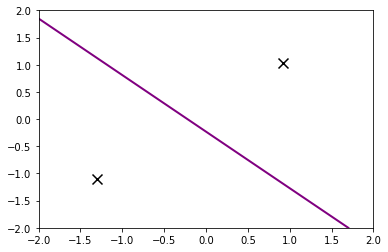

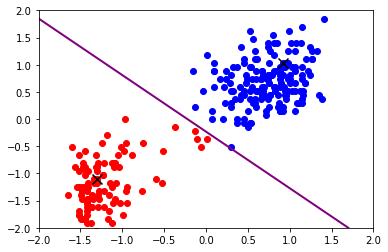

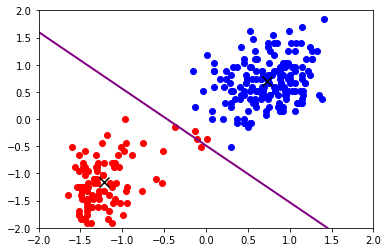

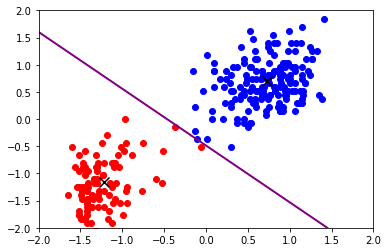

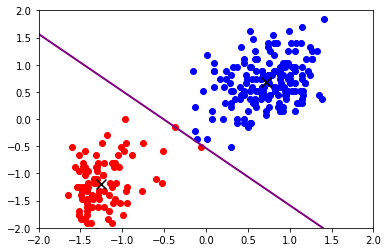

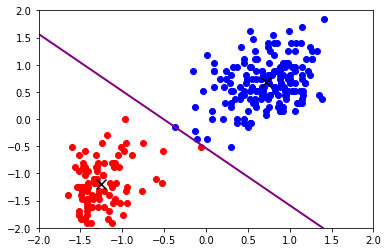

In [14]:
#convert the dataframe to a numpy array
df_stand_array = df_stand.to_numpy()
#initialize the number of clusters
k = 2
#initialize the centroids
centroids = df_stand_array[np.random.choice(df_stand_array.shape[0], k, replace=False)]
#centroids = np.array([[-1,1],[1,-1]])
#call the function
centroids, indicator, iterations = kmeans(k, df_stand_array, centroids)




We can observe that our algorithms worked and successfully found the clusters

## plot the j vs iteration

[1360.5948329247474, 465.66429409197144, 321.87906968334187, 173.49196559760327]
[0.5, 1, 1.5, 2]


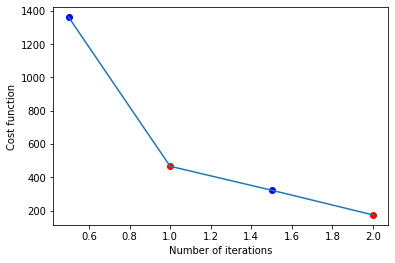

In [13]:
# plot the cost function vs the number of iterations
print(costs)
print(iter)
# put a blue dot at even indices of iter and red dot at odd indices of iter
plt.scatter(iter[::2], costs[::2], color='blue')
plt.scatter(iter[1::2], costs[1::2], color='red')
plt.plot(iter, costs)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()